# Exploratory Data Analysis

We will begin by importing our dataset. The dataset we are using includes measurements of air quality from Buccleauch municipality of Johannesburg, South Africa. Specifically, we are focusing on data recorded between 2010 and 2014.

The dataset we are using is provided by [University of Capetown](https://zivahub.uct.ac.za/articles/dataset/Johannesburg_Air_Quality_Data/7246784/1) data repository. Alternatively you can download it from the workshop's repository here.

## Reading Data

We use the variable name `df` to refer to a *DataFrame*. A *DataFrame* can be considered as a table comprised of columns (which hold the headings) and rows (which contain the data). It is similar to working with an Excel spreadsheet.

In [2]:
import pandas as pd
df = pd.read_csv("dataset/buccleuch-2010-2014.csv")

To view the structure such as size of the dataset or data type, we can use `.info()` function.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14650 entries, 0 to 14649
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LogDate  14650 non-null  object 
 1   NO       8775 non-null   float64
 2   NO2      6681 non-null   float64
 3   NOX      8881 non-null   float64
 4   O3       4698 non-null   float64
 5   PM10     12331 non-null  float64
 6   PM2.5    6650 non-null   float64
 7   SO2      4311 non-null   float64
 8   WIND     7749 non-null   float64
 9   WINDS    7749 non-null   float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


To display the first five rows of the *DataFrame*, we can use the `.head()` function. This method is useful for getting a quick glimpse of the data structure and contents in *DataFrame*.

In [3]:
df.head()

,LogDate,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WIND,WINDS
0,9/1/2010 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2010 2:00:00 AM,105.181818,33.181818,140.909091,NaN,84.454545,50.818182,6.090909,150.092361,0.972727
2,9/1/2010 3:00:00 AM,84.909091,31.636364,119.636364,NaN,81.181818,51.090909,5.000000,147.804834,0.981818
3,9/1/2010 4:00:00 AM,79.181818,28.545455,110.636364,NaN,60.272727,39.727273,4.090909,155.345099,0.863636
4,9/1/2010 5:00:00 AM,207.090909,22.545455,232.545455,NaN,55.272727,35.636364,7.272727,141.959703,0.854545


### Multivariate

As evident from the given dataset, it is multivariate and consists of several columns that represent different kinds of data. Some of the column names are self-explanatory, while others may require additional context. Here is a brief explanation:

* `LogDate` represents the date and time when each entry was recorded.
* `NO`, `NO2`, and `NOX` refer to the levels of nitrogen oxide, nitrogen dioxide, and combined forms of nitrogen oxides, respectively.
* `O3` denotes the levels of ozone.
* `PM10` and `PM2.5` refer to the levels of particulate matter in the air with an aerodynamic diameter of less than 10μm and 2.5μm, respectively.
* `SO2` represents the levels of sulfur dioxide.
* `WIND` and `WINDS` stand for the direction and speed of the wind, respectively.

### NaN

`NaN` indicates missing values, which are sometimes referred to as `Null` or `None`.

## Descriptive Statistics
The `describe` function in Pandas is a versatile tool that offers various descriptive statistics. This function returns the count of non-empty rows, the mean value for each column, and a five-number summary, presenting the minimum value, 25th percentile, median (50th percentile), 75th percentile, and the maximum value for each respective column. 

This brief statistical summary can provide a better understanding of the distribution of values in the dataset.

In [4]:
df.describe()

,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WIND,WINDS
count,8775.000000,6681.000000,8881.000000,4698.000000,12331.000000,6650.000000,4311.000000,7749.000000,7749.000000
mean,79.902242,28.116054,93.882540,8.843053,51.769043,42.125373,12.232701,177.237919,1.440963
std,104.295170,81.720432,118.168232,9.643190,42.675023,33.232319,48.272566,95.921596,1.054109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039194,0.000000
25%,9.166667,1.333333,11.818182,2.965909,23.500000,19.727273,3.590909,104.934490,0.681818
50%,45.583333,2.800000,53.500000,6.213636,41.250000,35.454545,7.363636,150.365682,1.181818
75%,102.458333,7.000000,121.363636,10.663636,68.500000,56.636364,9.727273,276.646539,1.981818
max,892.000000,756.181818,907.454545,97.127273,716.636364,519.272727,492.583333,359.909088,9.145455


Note how nearly every column in our *DataFrame* has a minimum value of 0. This may appear unusual, given that it is unlikely for these real-world sensors to register readings of 0. In typical machine learning projects, you would usually consult with an industry expert to help identify such anomalies.


## Identifying Missing Values

Determining the number `NaN` values in our dataset is beneficial as it enables us to consider data clearning strategies, such as removing rows with missing values or implementing an imputation method to replace them.

We can achieve this by calculating the mean across each column, where each `True` value (indicating `NaN`) is counted as `1``, and each `False` value is counted as `0`.

Let's check the number of `NaN` values present in our data and take a close look at the basic statistics of our dataset.

In [5]:
df.isna().head()

,LogDate,NO,NO2,NOX,O3,PM10,PM2.5,SO2,WIND,WINDS
0,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


Internally, Pandas interprets boolean values as `0` for `False` and `1` for `True`. This means that when we calculate the average, or `.mean()`, across these boolean values, we are effectively computing the proportion of non-`NaN` values of each column.

In [6]:
df.isna().mean()

LogDate    0.000000
NO         0.401024
NO2        0.543959
NOX        0.393788
O3         0.679317
PM10       0.158294
PM2.5      0.546075
SO2        0.705734
WIND       0.471058
WINDS      0.471058
dtype: float64

From this simple analysis, it is evident that `N02`, `O3`, and `SO2` fields have over 50% missing data. It is worth considering the exclusion of the features from any subsequent modeling, as such high levels of missing data could introduce noise that negatively impacts the quality of the model.

## Data Cleaning

A [pair plot]([Title](https://seaborn.pydata.org/generated/seaborn.pairplot.html)) is a useful tool for visualising and gaining a deeper understanding of our data by focusing on specific columns. For clarity, we will set `corner=True` in our pair plot. This takes into account that off-diagonal values are essentially opposites (i.e., feature A on the x-axis and feature B on the y-axis, or vice versa).

Strictly speaking, we are interested in all the columns, but including all nine columns might make the plot a bit intricate to decipher. As a starting point, let's create a plot using a smaller subset of readings, specifically the `NO`, `NO2`, and `NOX` columns. However, feel free to experiment and explore the data by plotting more columns or using different column combinations.

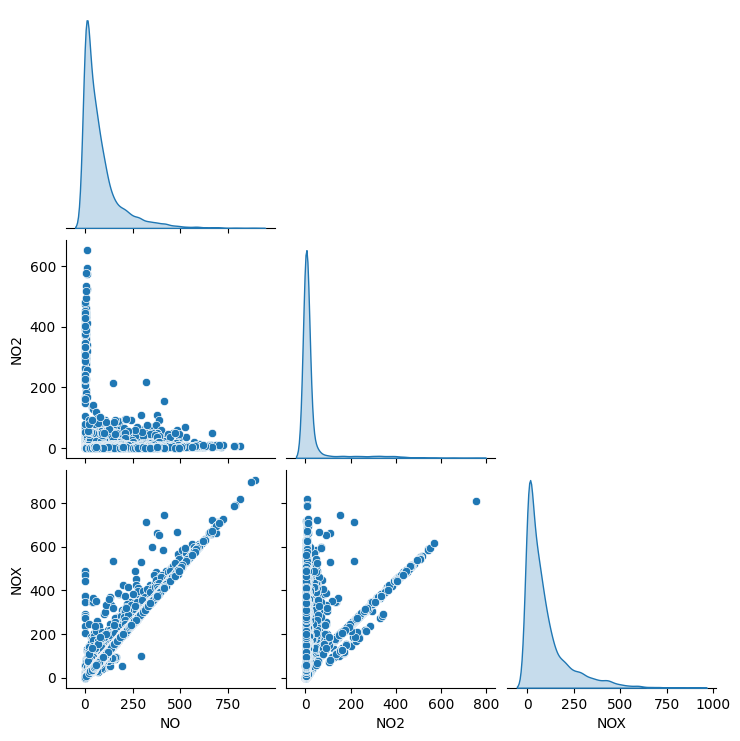

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[['NO', 'NO2', 'NOX']], # Try including more columns from the dataset
    diag_kind='kde', 
    corner=True
)
plt.show()

Upon examining the correlation plots, you may notice numerous `0`s, especially evident when comparing `NOX` and `NO2`. These numerous `0`s appear to be problematic readings, creating a noticeable impact on the linear correlation between these variables. This issue becomes even more pronounced when we include more columns from the original dataset.

Additionally, numerous histograms on the diagonal exhibit high peaks near `0`. Let's explore how these distributions change if we remove the problematic zero entries.

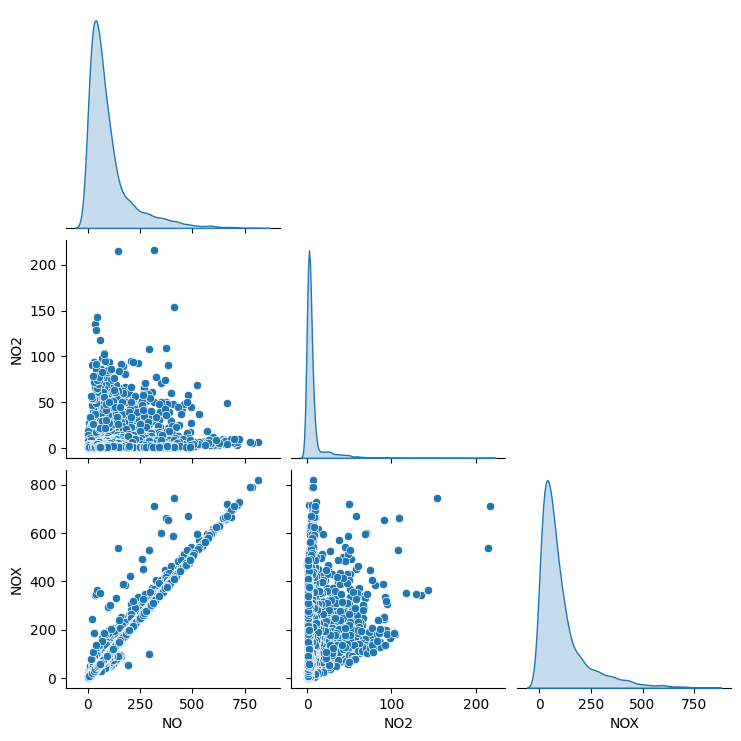

In [4]:
import numpy as np
sns.pairplot(
    df[['NO', 'NO2', 'NOX']].replace(0, np.nan).dropna(), 
    diag_kind='kde', 
    corner=True
)
plt.show()

The data is now in a much cleaner state. Next, let's eliminate the columns that are irrelevant to our analysis, such as the 'date' column, and exclude all the rows that contain `0` values.